<a href="https://colab.research.google.com/github/YoushaAdib/Python-Portfolio/blob/main/Benford's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Setup
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Function for Benford's Law
def benfords_law_distribution(): 
  digits = range(1,10)
  distribution = [np.log10(1+1/d) for d in digits]
  return dict(zip(digits, distribution))

In [4]:
# Function to Calculate First Digits
def first_digit_distribution(data):
    first_digits = []
    for x in data:
        if x != 0 and x != "":
            try:
                first_digits.append(int(str(abs(float(x)))[0]))
            except ValueError:
                continue
    unique_digits, counts = np.unique(first_digits, return_counts=True)
    return dict(zip(unique_digits, counts / len(first_digits)))


In [18]:
# Single Plot
def plot_distributions(actual, expected):
    digits = range(1, 10)
    actual_values = [actual.get(d, 0) for d in digits]
    expected_values = [expected[d] for d in digits]

    plt.bar(digits, actual_values, alpha=0.7, label="Actual")
    plt.plot(digits, expected_values, 'r', marker='o', label="Expected (Benford's Law)")
    plt.xlabel('First Digit')
    plt.ylabel('Probability')
    plt.title("Benford's Distribution")
    plt.legend()
    plt.xticks(digits, [str(d) for d in digits])
    plt.show()

In [20]:
# Multiple Plot
def plot_distributions_m(ax, title, actual, expected):
    digits = range(1, 10)
    actual_values = [actual.get(d, 0) for d in digits]
    expected_values = [expected[d] for d in digits]

    rects = ax.bar(digits, actual_values, alpha=0.7, label="Actual")
    ax.plot(digits, expected_values, 'r', marker='o', label="Expected (Benford's Law)")
    ax.set_xlabel('First Digit')
    ax.set_ylabel('Probability')
    ax.set_title(title)
    ax.legend()
    ax.set_xticks(digits)
    ax.set_xticklabels([str(d) for d in digits])

    for rect, value in zip(rects, actual_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, f'{value:.3f}', ha='center', va='bottom')

In [6]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/1_UK/1_Yousha Adib/6_Portfolio Projects/Benfords Law/BL.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


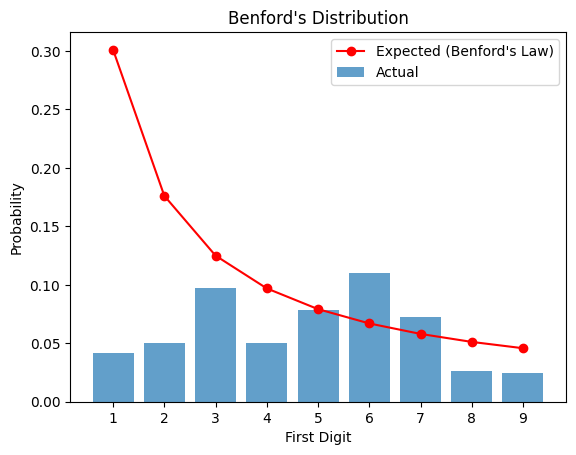

In [19]:
# Benford's Distribution - Sinple Plot 
column_to_analyse = 'Value '
sample_data = data[column_to_analyse].values

actual_distribution = first_digit_distribution(sample_data)
expected_distribution = benfords_law_distribution()
plot_distributions(actual_distribution, expected_distribution)

In [8]:
#Covid 19 Dataset 
file_path = '/content/drive/MyDrive/1_UK/1_Yousha Adib/6_Portfolio Projects/Benfords Law/Covid19.csv'
covid_data = pd.read_csv(file_path)

In [11]:
covid_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


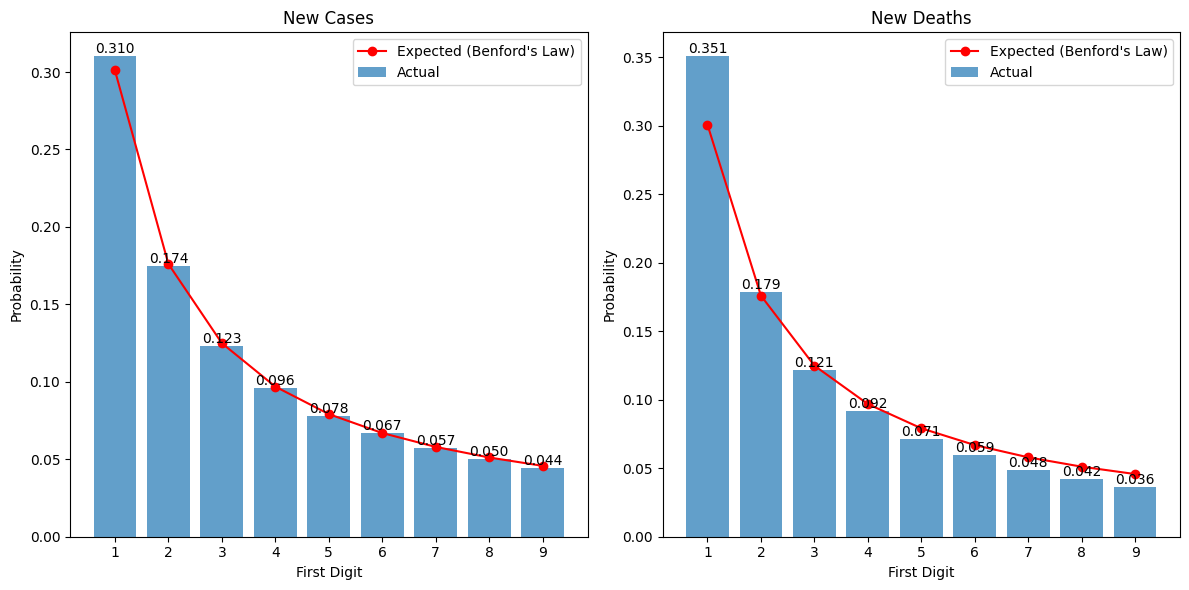

In [21]:
# Benford's Distribution - Multiple Plot
column_to_analyse1 = 'New_cases'
column_to_analyse2 = 'New_deaths'

sample_data1 = covid_data[column_to_analyse1].values
sample_data2 = covid_data[column_to_analyse2].values

actual_distribution1 = first_digit_distribution(sample_data1)
actual_distribution2 = first_digit_distribution(sample_data2)

expected_distribution = benfords_law_distribution()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_distributions_m(ax1, 'New Cases', actual_distribution1, expected_distribution)
plot_distributions_m(ax2, 'New Deaths', actual_distribution2, expected_distribution)

plt.tight_layout()
plt.show()
